<img src="https://avatars.githubusercontent.com/u/61354833" align="left" width="70" height="70">

Code by [TomMakesThings](https://tommakesthings.github.io/Clustering-and-TDA-of-scRNA-seq-Data/)

# **About**
This is part of a research project "Clustering and Topological Data Analysis of Single-Cell RNA Sequencing Data". For more information visit: https://tommakesthings.github.io/Clustering-and-TDA-of-scRNA-seq-Data/.

In this notebook, a new simulated dataset of scRNA-seq gene counts and group labels is created using the Splat simulator which is part of the [R package Splatter](https://bioconductor.org/packages/devel/bioc/vignettes/splatter/inst/doc/splatter.html). The dataset is seeded by mimicking gene expression from a dataset of human lung adenocarcinoma cells [sc_10x](https://github.com/LuyiTian/sc_mixology) by Tian et al. The new data is then saved as CSV files with Python.

# **Imports**

In [ ]:
# Allows R code to be executed using %%R before execution
%reload_ext rpy2.ipython

from google.colab import files
import pandas as pandas

In [ ]:
%%R
# Download Splatter
install.packages("BiocManager")
BiocManager::install(version = "3.12")
BiocManager::install("splatter") # Takes long time to download

suppressPackageStartupMessages({
  library(splatter)
  library(scater)
})

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.12.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 261321 bytes (255 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


Update all/some/none? [a/s/n]: 

R[write to console]: also installing the dependencies ‘data.table’, ‘gargle’, ‘ids’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5303849 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


Citation for Splatter and the original paper.

In [ ]:
%%R
citation("splatter")


  Zappia L, Phipson B, Oshlack A. Splatter: Simulation of single-cell
  RNA sequencing data. Genome Biology. 2017;
  doi:10.1186/s13059-017-1305-0

A BibTeX entry for LaTeX users is

  @Article{,
    author = {Luke Zappia and Belinda Phipson and Alicia Oshlack},
    title = {Splatter: simulation of single-cell RNA sequencing data},
    journal = {Genome Biology},
    year = {2017},
    url = {http://dx.doi.org/10.1186/s13059-017-1305-0},
    doi = {10.1186/s13059-017-1305-0},
  }



# **Get Dataset to Replicate**
Use R to download the dataset sc_10x from Luyi Tian's [GitHub](https://github.com/LuyiTian/sc_mixology) and open as `dataset`.

In [ ]:
%%R
# URL of dataset to replicate
dataset_URL <- "https://github.com/LuyiTian/sc_mixology/blob/master/data/sincell_with_class.RData?raw=true"
connection <- gzcon(url(dataset_URL))
# Download data as SingleCellExperiment class
dataset <- get(load(connection))
dataset

class: SingleCellExperiment 
dim: 16468 902 
metadata(3): scPipe Biomart log.exprs.offset
assays(2): counts logcounts
rownames(16468): ENSG00000272758 ENSG00000154678 ... ENSG00000054219
  ENSG00000137691
rowData names(0):
colnames(902): CELL_000001 CELL_000002 ... CELL_000955 CELL_000965
colData names(15): unaligned aligned_unmapped ... cell_line_demuxlet
  demuxlet_cls
reducedDimNames(0):
altExpNames(0):


Get the gene counts from `dataset` and view an extract.

In [ ]:
%%R
# Get number of features (genes) for a sample (cell)
total_genes <- dim(counts(dataset))[[1]][1]
# Get matrix of gene reads per cell sample
counts <- counts(dataset)
counts[1:5, 1:5]

                CELL_000001 CELL_000002 CELL_000003 CELL_000004 CELL_000005
ENSG00000272758           0           0           0           2           0
ENSG00000154678           0           0           0           1           0
ENSG00000148737           0           0           0           1           3
ENSG00000196968           0           0           0           1           2
ENSG00000134297           0           0           0           1           1


# **Create Simulated Datasets**

# Splat Simulation

Simulate a single population of cells that replicates the variation of sc_10x.

In [ ]:
%%R
# Create dataset using Splat for a single population of cells
parameters <- splatEstimate(counts)
simulated <- splatSimulate(parameters, verbose = FALSE)
simulated

class: SingleCellExperiment 
dim: 16468 902 
metadata(1): Params
assays(6): BatchCellMeans BaseCellMeans ... TrueCounts counts
rownames(16468): Gene1 Gene2 ... Gene16467 Gene16468
rowData names(4): Gene BaseGeneMean OutlierFactor GeneMean
colnames(902): Cell1 Cell2 ... Cell901 Cell902
colData names(3): Cell Batch ExpLibSize
reducedDimNames(0):
altExpNames(0):


      Cell1 Cell2 Cell3 Cell4 Cell5
Gene1    13    21     7     5    28
Gene2    11     1     7     1     7
Gene3     8     0     2     2     0
Gene4     0     0     0     0     0
Gene5     0     0     0     0     0



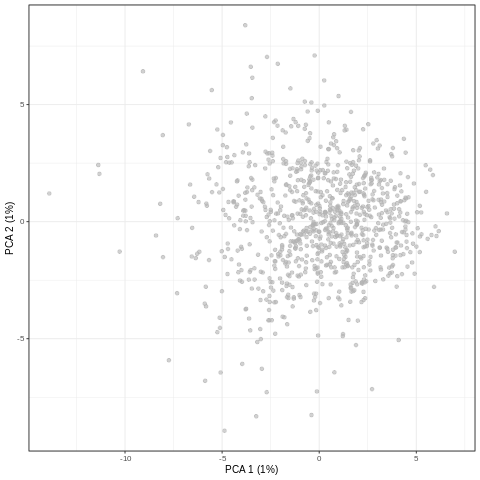

In [ ]:
%%R
# Print extract of dataset
simulated_counts <- counts(simulated)
print(simulated_counts[1:5, 1:5])
cat("\n")

# Plot first two principal components extracted by PCA to visualise the dataset
sim <- logNormCounts(simulated)
sim <- runPCA(sim)
plotPCA(sim)

Simulate 4 groups of cells seeded by sc_10x.

      Cell1 Cell2 Cell3 Cell4 Cell5
Gene1     2     6     1     7     4
Gene2     0     0     0     0     0
Gene3     2     4     2     5     0
Gene4     0     0     7     0     0
Gene5     2     1     0     0     0



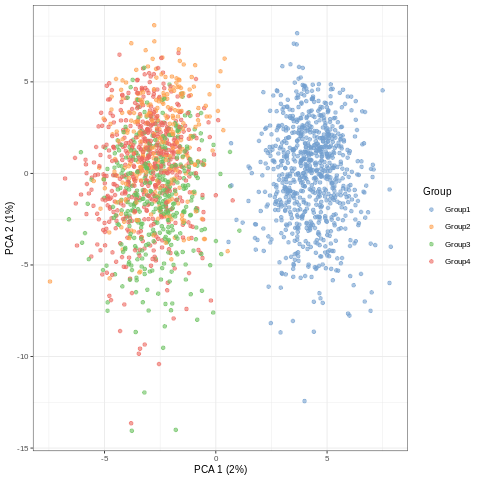

In [ ]:
%%R
# Simulate cells in groups
simulated.groups <- splatSimulate(parameters, # Use parameters of sc_10x
                                  group.prob = c(0.4, 0.15, 0.2, 0.25), # Chance of each cell belonging to group
                                  method = "groups", # Create groups of cells rather than single
                                  verbose = FALSE, # Supress printing
                                  nGenes = total_genes, # Use same number of genes as dataset
                                  batchCells = 2000) # Create 2000 cells
# View extract of simulated data
simulated_group_counts <- counts(simulated.groups)
print(simulated_group_counts[1:5, 1:5])
cat("\n")

# Plot PCA to visualise new dataset
simulated.groups <- logNormCounts(simulated.groups)
simulated.groups <- runPCA(simulated.groups)
plotPCA(simulated.groups, colour_by = "Group")

In [ ]:
%%R
# View information about new dataset
simulated.groups

class: SingleCellExperiment 
dim: 16468 2000 
metadata(1): Params
assays(7): BatchCellMeans BaseCellMeans ... counts logcounts
rownames(16468): Gene1 Gene2 ... Gene16467 Gene16468
rowData names(8): Gene BaseGeneMean ... DEFacGroup3 DEFacGroup4
colnames(2000): Cell1 Cell2 ... Cell1999 Cell2000
colData names(5): Cell Batch Group ExpLibSize sizeFactor
reducedDimNames(1): PCA
altExpNames(0):


Get the group labels of each cell.

In [ ]:
%%R
# List of group assignments for each cell
groups_metadata <- colData(simulated.groups)[,3]

# Compare Simulations

Plot a graph comparing the simulated data to the original dataset based upon the distribution of mean expression. This demonstrates how well the Splatter was able to immitate the data.

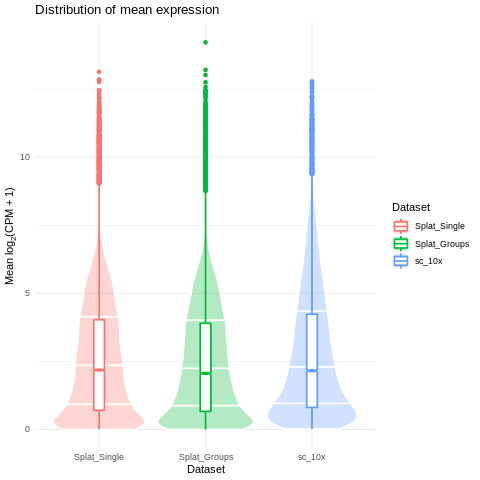

In [ ]:
%%R
# Plot graph comparing simulated and real data
comparison <- compareSCEs(list(Splat_Single = simulated, Splat_Groups = simulated.groups, sc_10x = dataset))
comparison$Plots$Means

# **Save Data to File**

Using R, save the simulated group data and the matching labels as CSV files.

In [ ]:
%%R
# Save as SingleCellExperiment and compressed csv
RData_file = '/simulated.RData'
csv_file = '/simulated_counts.csv.gz'
metadata_csv_file = '/simulated_metadata.csv.gz'
save(simulated.groups, file=RData_file)
write.csv(simulated_group_counts, file=gzfile(csv_file))
write.csv(groups_metadata, file=gzfile(metadata_csv_file))

Now download the files using Python.

In [ ]:
# Download data
RData_file = '/simulated.RData' # Repeated as Python not R
csv_file = '/simulated_counts.csv.gz'
metadata_csv_file = '/simulated_metadata.csv.gz'
#files.download(RData_file)
files.download(csv_file)
files.download(metadata_csv_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

View the simulated group data and the labels of each cell as DataFrames.

In [ ]:
dataset = pandas.read_csv(csv_file, index_col=0)
dataset

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,Cell11,Cell12,Cell13,Cell14,Cell15,Cell16,Cell17,Cell18,Cell19,Cell20,Cell21,Cell22,Cell23,Cell24,Cell25,Cell26,Cell27,Cell28,Cell29,Cell30,Cell31,Cell32,Cell33,Cell34,Cell35,Cell36,Cell37,Cell38,Cell39,Cell40,...,Cell1961,Cell1962,Cell1963,Cell1964,Cell1965,Cell1966,Cell1967,Cell1968,Cell1969,Cell1970,Cell1971,Cell1972,Cell1973,Cell1974,Cell1975,Cell1976,Cell1977,Cell1978,Cell1979,Cell1980,Cell1981,Cell1982,Cell1983,Cell1984,Cell1985,Cell1986,Cell1987,Cell1988,Cell1989,Cell1990,Cell1991,Cell1992,Cell1993,Cell1994,Cell1995,Cell1996,Cell1997,Cell1998,Cell1999,Cell2000
Gene1,2,6,1,7,4,2,0,1,1,2,0,4,6,3,0,4,0,1,0,4,1,6,7,1,6,8,10,0,1,4,0,1,5,3,0,5,1,6,4,3,...,1,0,1,5,2,2,2,2,3,4,1,3,3,14,1,1,4,2,0,0,12,13,1,7,1,0,1,0,0,8,2,4,4,1,0,2,0,2,0,1
Gene2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
Gene3,2,4,2,5,0,7,0,2,0,6,0,1,2,1,1,0,0,1,0,1,0,9,4,4,0,1,1,4,1,2,1,7,2,3,5,3,0,4,6,4,...,5,1,1,1,0,8,0,0,3,0,0,1,8,3,8,5,1,3,2,1,2,3,0,6,0,1,0,2,0,5,2,1,5,9,1,0,2,0,7,1
Gene4,0,0,7,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,0,2,1,0,0,1,0,1,0,1,8,1,1,0,1,0,3,1,0,3,2,...,0,0,0,1,0,0,1,0,0,0,1,0,1,14,0,3,4,0,0,5,1,2,0,2,0,0,1,1,0,2,4,0,1,0,3,4,0,0,0,0
Gene5,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gene16464,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Gene16465,1,4,0,0,2,6,2,9,0,8,1,14,6,4,7,4,1,9,4,0,2,7,14,0,0,4,5,3,5,5,4,10,5,7,3,6,0,0,11,4,...,8,0,2,2,3,1,2,3,2,8,0,1,3,16,4,1,3,2,3,2,1,23,0,5,2,5,13,1,3,10,5,1,8,3,10,2,11,3,22,4
Gene16466,5,12,1,8,5,7,0,7,1,7,2,3,12,5,7,8,1,2,0,0,2,14,11,3,9,5,0,4,11,1,0,0,1,35,1,0,6,14,2,5,...,13,0,6,0,10,8,1,3,5,11,0,4,4,9,0,3,3,7,16,9,1,21,1,2,2,10,0,2,7,1,3,4,7,7,1,2,13,10,5,2
Gene16467,0,5,0,0,0,1,0,0,5,2,5,0,0,0,0,2,0,0,0,0,2,2,1,0,0,0,7,0,2,5,2,3,0,6,0,0,0,0,0,0,...,5,0,1,1,0,0,0,3,4,1,7,2,5,0,0,0,3,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,1


In [ ]:
metadata = pandas.read_csv(metadata_csv_file, index_col=0)
metadata

,x
1,Group4
2,Group3
3,Group1
4,Group3
5,Group2
...,...
1996,Group3
1997,Group1
1998,Group1
1999,Group3
